In [2]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
df = df[df['job_title_short'] == 'Data Analyst']

df_exploded = df.explode('job_skills')

In [4]:
skill_count = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [5]:
skill_stats = skill_count.sort_values(by='skill_count', ascending=False).head(10)

<Figure size 1000x600 with 0 Axes>

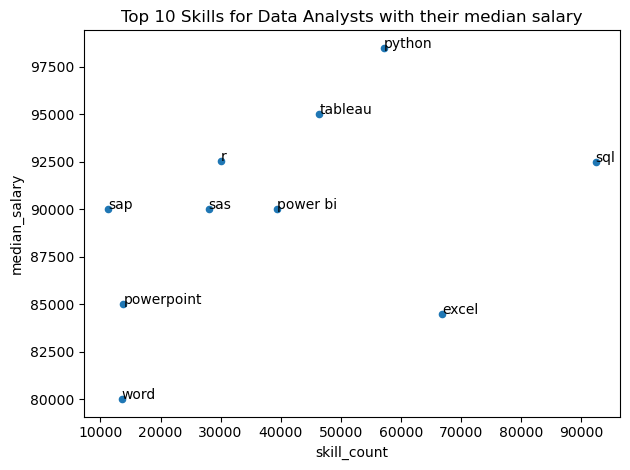

In [9]:
plt.figure(figsize=(10, 6))
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

plt.title('Top 10 Skills for Data Analysts with their median salary')
plt.xlabel('skill_count')
plt.ylabel('median_salary')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()